For an autoencoder, we take the data, compress it, then try and reconstruct the data from the compressed data. 

Using TensorFlow backend.


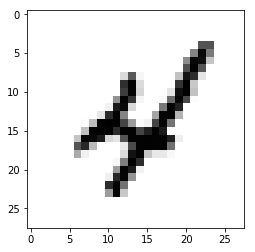

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, UpSampling2D, Input
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
%matplotlib inline

(X_train, y_train), (X_test, y_test) = mnist.load_data()
plt.imshow(X_train[9], cmap='Greys')

In [2]:
# defining our callbacks
earlystopping = EarlyStopping(patience=4, monitor='val_loss', verbose=1)
reducelr = ReduceLROnPlateau(patience=2, monitor='val_loss', verbose=1)
callbacks = [earlystopping, reducelr]

In [3]:
# reshape
X_train = X_train.reshape(len(X_train), 784).astype('float32')
X_test = X_test.reshape(len(X_test), 784).astype('float32')

#normalize
X_train = X_train/255
X_test = X_test/255

In [4]:
model = Sequential()

model.add(Dense(784, input_shape=(784,)))
model.add(Activation('relu'))

model.add(Dense(32))
model.add(Activation('relu'))

model.add(Dense(784))
model.add(Activation('sigmoid'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy', 'mse'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
activation_1 (Activation)    (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25120     
_________________________________________________________________
activation_2 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 784)               25872     
_________________________________________________________________
activation_3 (Activation)    (None, 784)               0         
Total params: 666,432
Trainable params: 666,432
Non-trainable params: 0
_________________________________________________________________


Note how our loss is `mean_squared_error` because we are looking at how accurately our NN reconstructs each pixel of our input. So we can take the mean squared error of each pixel between the input and output.

In [5]:
history_vanilla = model.fit(X_train, X_train, epochs=100, validation_data=(X_test, X_test), callbacks=callbacks) # note how accuracy is not a good metric for autoencoders

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 7s 118us/step - loss: 0.0238 - acc: 0.0111 - mean_squared_error: 0.0238 - val_loss: 0.0126 - val_acc: 0.0116 - val_mean_squared_error: 0.0126
Epoch 2/100
60000/60000 [==============================] - 6s 97us/step - loss: 0.0118 - acc: 0.0120 - mean_squared_error: 0.0118 - val_loss: 0.0105 - val_acc: 0.0118 - val_mean_squared_error: 0.0105
Epoch 3/100
60000/60000 [==============================] - 6s 101us/step - loss: 0.0104 - acc: 0.0129 - mean_squared_error: 0.0104 - val_loss: 0.0096 - val_acc: 0.0116 - val_mean_squared_error: 0.0096
Epoch 4/100
60000/60000 [==============================] - 6s 99us/step - loss: 0.0098 - acc: 0.0126 - mean_squared_error: 0.0098 - val_loss: 0.0093 - val_acc: 0.0128 - val_mean_squared_error: 0.0093
Epoch 5/100
60000/60000 [==============================] - 6s 99us/step - loss: 0.0094 - acc: 0.0124 - mean_squared_error: 0.0094 - val_loss: 0.0089

60000/60000 [==============================] - 6s 98us/step - loss: 0.0061 - acc: 0.0132 - mean_squared_error: 0.0061 - val_loss: 0.0063 - val_acc: 0.0131 - val_mean_squared_error: 0.0063
Epoch 39/100
60000/60000 [==============================] - 6s 98us/step - loss: 0.0061 - acc: 0.0132 - mean_squared_error: 0.0061 - val_loss: 0.0063 - val_acc: 0.0131 - val_mean_squared_error: 0.0063

Epoch 00039: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-12.
Epoch 40/100
60000/60000 [==============================] - 6s 99us/step - loss: 0.0061 - acc: 0.0132 - mean_squared_error: 0.0061 - val_loss: 0.0063 - val_acc: 0.0131 - val_mean_squared_error: 0.0063
Epoch 00040: early stopping


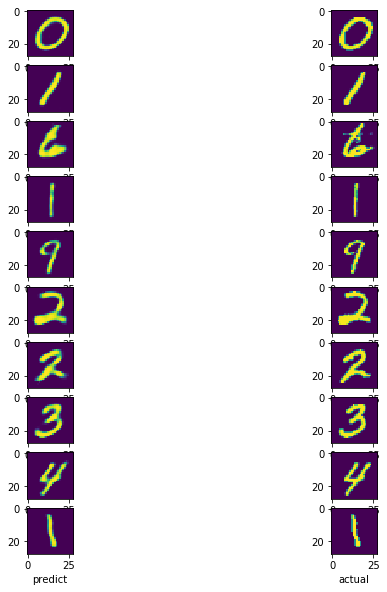

In [6]:
predictions = model.predict(X_test)
plt.figure(figsize=(10,10))

for i in range(10):
    index = np.random.randint(0, len(X_test))
    plt.subplot(10, 2, 2*i+1)
    plt.imshow(predictions[index].reshape(28,28))
    plt.xlabel('predict')
    plt.subplot(10, 2, 2*i+2)
    plt.imshow(X_test[index].reshape(28,28))
    plt.xlabel('actual')

In [7]:
# multilayer autoencoder
multilayered = Sequential()
multilayered.add(Dense(128, input_shape=(784,), activation='relu'))
multilayered.add(Dense(32, activation='relu'))

multilayered.add(Dense(32, activation='relu'))
multilayered.add(Dense(784, activation='sigmoid'))

multilayered.compile(loss='mse', optimizer='rmsprop', metrics=['accuracy', 'mse'])
multilayered.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_7 (Dense)              (None, 784)               25872     
Total params: 131,536
Trainable params: 131,536
Non-trainable params: 0
_________________________________________________________________


In [8]:
history_multilayer = multilayered.fit(X_train, X_train, epochs=100, validation_data=(X_test, X_test), callbacks=callbacks)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 6s 93us/step - loss: 0.0319 - acc: 0.0101 - mean_squared_error: 0.0319 - val_loss: 0.0200 - val_acc: 0.0107 - val_mean_squared_error: 0.0200
Epoch 2/100
60000/60000 [==============================] - 5s 86us/step - loss: 0.0185 - acc: 0.0096 - mean_squared_error: 0.0185 - val_loss: 0.0170 - val_acc: 0.0095 - val_mean_squared_error: 0.0170
Epoch 3/100
60000/60000 [==============================] - 5s 87us/step - loss: 0.0155 - acc: 0.0100 - mean_squared_error: 0.0155 - val_loss: 0.0142 - val_acc: 0.0111 - val_mean_squared_error: 0.0142
Epoch 4/100
60000/60000 [==============================] - 5s 91us/step - loss: 0.0140 - acc: 0.0117 - mean_squared_error: 0.0140 - val_loss: 0.0132 - val_acc: 0.0117 - val_mean_squared_error: 0.0132
Epoch 5/100
60000/60000 [==============================] - 5s 91us/step - loss: 0.0131 - acc: 0.0119 - mean_squared_error: 0.0131 - val_loss: 0.0128 -

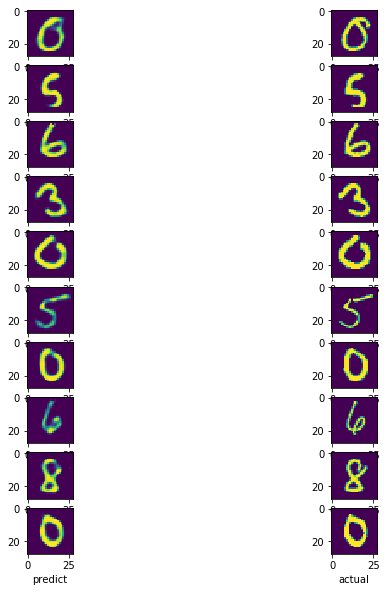

In [21]:
predictions = multilayered.predict(X_test)
plt.figure(figsize=(10,10))

for i in range(10):
    index = np.random.randint(0, len(X_test))
    plt.subplot(10, 2, 2*i+1)
    plt.imshow(predictions[index].reshape(28,28))
    plt.xlabel('predict')
    plt.subplot(10, 2, 2*i+2)
    plt.imshow(X_test[index].reshape(28,28))
    plt.xlabel('actual')

In [10]:
# CONVOLUTIONAL AUTOENCODER
# from keras.datasets import mnist
# import matplotlib.pyplot as plt
# import numpy as np
# from keras.models import Sequential, Model
# from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, UpSampling2D, Input, Flatten
# from sklearn.preprocessing import MinMaxScaler
# from keras.utils import to_categorical
# %matplotlib inline

convmodel = Sequential()
convmodel.add(Conv2D(32, (3,3), input_shape=(28,28,1), padding='same')) 
# without padding, the output size becomes (26, 26, 32)
convmodel.add(Activation('relu'))
convmodel.add(MaxPooling2D(pool_size=(2,2)))

convmodel.add(Conv2D(16, (3,3), padding='same'))
convmodel.add(Activation('relu'))
convmodel.add(MaxPooling2D(pool_size=(2,2)))

convmodel.add(Conv2D(8, (3,3), padding='same'))
convmodel.add(Activation('relu'))

################## HEY WHAT NO MAXPOOLING?

convmodel.add(Conv2D(8, (3,3), padding='same'))
convmodel.add(Activation('relu'))
convmodel.add(UpSampling2D((2,2)))

convmodel.add(Conv2D(16, (3,3), padding='same'))
convmodel.add(Activation('relu'))
convmodel.add(UpSampling2D((2,2)))

convmodel.add(Conv2D(1, (3,3), padding='same'))

convmodel.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy', 'mse'])
convmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_4 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 16)        4624      
_________________________________________________________________
activation_5 (Activation)    (None, 14, 14, 16)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 8)           1160      
__________

We have no maxpooling at that layer because, having a maxpooling layer will turn the output shape to (None, 3, 3, 8), causing us to lose information. 

In [11]:
# FOR CONVOLUTIONAL AUTOENCODERS
from keras.utils import to_categorical
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape
X_train = X_train.reshape(len(X_train), 28, 28, 1).astype('float32')
X_test = X_test.reshape(len(X_test), 28, 28, 1).astype('float32')

#normalize
X_train = X_train/255
X_test = X_test/255

y_train = to_categorical(y_train, dtype='float32')
y_test = to_categorical(y_test, dtype='float32')

In [12]:
history_conv = convmodel.fit(X_train, X_train, epochs=100, validation_data=(X_test, X_test), callbacks=callbacks)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 10s 168us/step - loss: 0.0110 - acc: 0.8142 - mean_squared_error: 0.0110 - val_loss: 0.0062 - val_acc: 0.8141 - val_mean_squared_error: 0.0062
Epoch 2/100
60000/60000 [==============================] - 9s 148us/step - loss: 0.0056 - acc: 0.8152 - mean_squared_error: 0.0056 - val_loss: 0.0050 - val_acc: 0.8143 - val_mean_squared_error: 0.0050
Epoch 3/100
60000/60000 [==============================] - 9s 148us/step - loss: 0.0048 - acc: 0.8153 - mean_squared_error: 0.0048 - val_loss: 0.0045 - val_acc: 0.8143 - val_mean_squared_error: 0.0045
Epoch 4/100
60000/60000 [==============================] - 9s 147us/step - loss: 0.0044 - acc: 0.8153 - mean_squared_error: 0.0044 - val_loss: 0.0042 - val_acc: 0.8144 - val_mean_squared_error: 0.0042
Epoch 5/100
60000/60000 [==============================] - 9s 149us/step - loss: 0.0042 - acc: 0.8154 - mean_squared_error: 0.0042 - val_loss: 0.

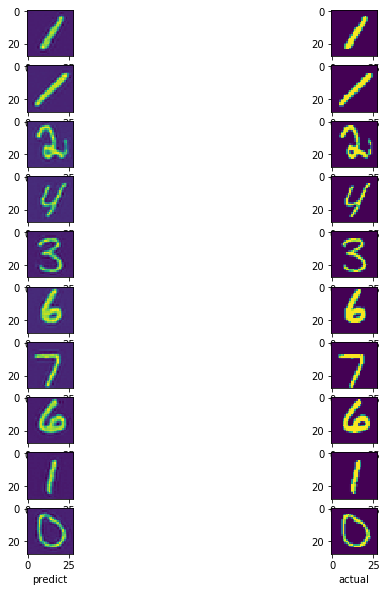

In [15]:
predictions = convmodel.predict(X_test)
plt.figure(figsize=(10,10))

for i in range(10):
    index = np.random.randint(0, len(X_test))
    plt.subplot(10, 2, 2*i+1)
    plt.imshow(predictions[index].reshape(28,28))
    plt.xlabel('predict')
    plt.subplot(10, 2, 2*i+2)
    plt.imshow(X_test[index].reshape(28,28))
    plt.xlabel('actual')

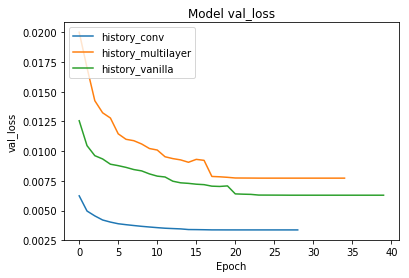

In [16]:
# Plot validation loss
histories = [history_conv, history_multilayer, history_vanilla]
for history in histories:
    plt.plot(history.history['val_loss'])
plt.title('Model val_loss')
plt.ylabel('val_loss')
plt.xlabel('Epoch')
plt.legend(['history_conv', 'history_multilayer', 'history_vanilla'], loc='upper left')
plt.show()


Now we will try to use the concept of autoencoders to denoise an image

In [29]:
noise_factor = 0.5

# adding gaussian noise to the samples
X_train_noisy = X_train + noise_factor*np.random.normal(loc=0, scale=1, size=X_train.shape)
X_test_noisy = X_test + noise_factor*np.random.normal(loc=0, scale=1, size=X_test.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

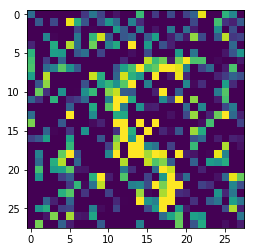

In [30]:
plt.imshow(X_train_noisy[100].reshape(28,28))

In [31]:
denoiser = Sequential()
denoiser.add(Conv2D(32, (3,3), input_shape=(28,28,1), padding='same')) 
# without padding, the output size becomes (26, 26, 32)
denoiser.add(Activation('relu'))
denoiser.add(MaxPooling2D(pool_size=(2,2)))

denoiser.add(Conv2D(16, (3,3), padding='same'))
denoiser.add(Activation('relu'))
denoiser.add(MaxPooling2D(pool_size=(2,2)))

denoiser.add(Conv2D(8, (3,3), padding='same'))
denoiser.add(Activation('relu'))

denoiser.add(Conv2D(8, (3,3), padding='same'))
denoiser.add(Activation('relu'))
denoiser.add(UpSampling2D((2,2)))

denoiser.add(Conv2D(16, (3,3), padding='same'))
denoiser.add(Activation('relu'))
denoiser.add(UpSampling2D((2,2)))

denoiser.add(Conv2D(1, (3,3), padding='same'))

denoiser.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy', 'mse'])
denoiser.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
activation_19 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 14, 14, 16)        4624      
_________________________________________________________________
activation_20 (Activation)   (None, 14, 14, 16)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 7, 7, 8)           1160      
__________

In [32]:
denoiser.fit(X_train_noisy, X_train, epochs=100, validation_data=(X_test_noisy, X_test), callbacks=callbacks)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 11s 176us/step - loss: 0.0228 - acc: 0.8107 - mean_squared_error: 0.0228 - val_loss: 0.0165 - val_acc: 0.8109 - val_mean_squared_error: 0.0165
Epoch 2/100
60000/60000 [==============================] - 10s 158us/step - loss: 0.0157 - acc: 0.8124 - mean_squared_error: 0.0157 - val_loss: 0.0148 - val_acc: 0.8113 - val_mean_squared_error: 0.0148
Epoch 3/100
60000/60000 [==============================] - 10s 159us/step - loss: 0.0145 - acc: 0.8127 - mean_squared_error: 0.0145 - val_loss: 0.0141 - val_acc: 0.8116 - val_mean_squared_error: 0.0141
Epoch 4/100
60000/60000 [==============================] - 10s 159us/step - loss: 0.0140 - acc: 0.8128 - mean_squared_error: 0.0140 - val_loss: 0.0137 - val_acc: 0.8116 - val_mean_squared_error: 0.0137
Epoch 5/100
60000/60000 [==============================] - 9s 157us/step - loss: 0.0137 - acc: 0.8129 - mean_squared_error: 0.0137 - val_loss:

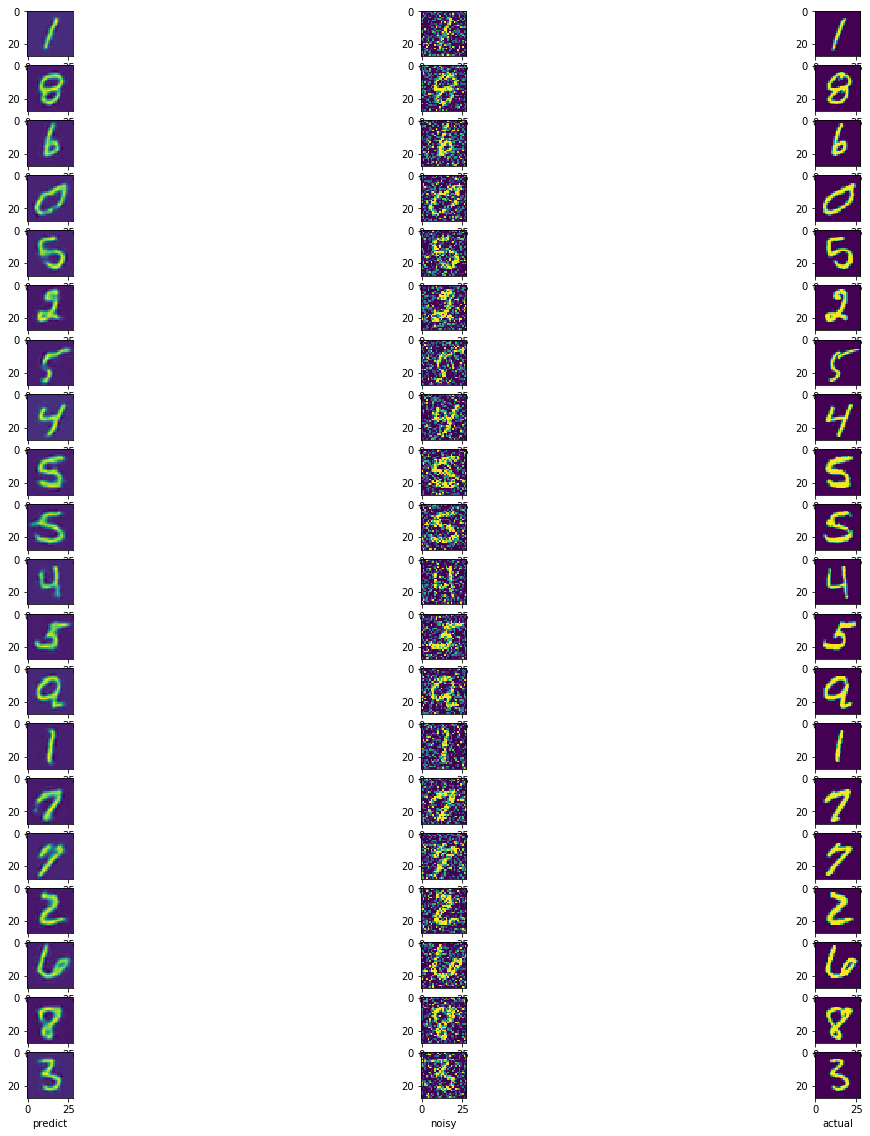

In [39]:
predictions = denoiser.predict(X_test_noisy)
plt.figure(figsize=(20,20))
n = 20
for i in range(n):
    index = np.random.randint(0, len(X_test))
    plt.subplot(n, 3, 3*i+1)
    plt.imshow(predictions[index].reshape(28,28))
    plt.xlabel('predict')
    plt.subplot(n, 3, 3*i+2)
    plt.imshow(X_test_noisy[index].reshape(28,28))
    plt.xlabel('noisy')
    plt.subplot(n, 3, 3*i+3)
    plt.imshow(X_test[index].reshape(28,28))
    plt.xlabel('actual')

In [37]:
denoiser.save('mnist_denoiser.h5')